In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../CSV/bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


### EDA 

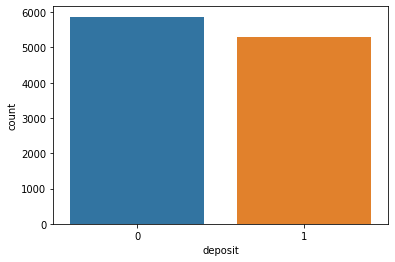

In [4]:
plt.figure()
sns.countplot(data=df,x="deposit")
plt.show()

In [5]:
cat_col = 

SyntaxError: invalid syntax (<ipython-input-5-1e84cde67b06>, line 1)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


### Modeling

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [5]:
# Model function
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [6]:
# Baseline model
log = LogisticRegression()

In [7]:
log = create_model(log)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [8]:
#Training score
log.score(X_train,y_train)

0.7976449507231537

### Decision Tree

In [10]:
dt1 = DecisionTreeClassifier()

In [11]:
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1760
           1       0.77      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [12]:
#Training score
dt1.score(X_train,y_train)

1.0

In [13]:
# this shows model has overfitted

In [14]:
#Important features
dt1.feature_importances_

array([0.08338668, 0.03297924, 0.01853703, 0.01393023, 0.00045636,
       0.08012624, 0.04326713, 0.00497466, 0.0615074 , 0.07854663,
       0.09561824, 0.35202729, 0.02094862, 0.06185853, 0.01396515,
       0.03787058])

In [15]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [16]:
# ploting Decision Tree
#from sklearn import tree
#tree.plot_tree(dt1)

### Purning

In [17]:
dt1.get_depth()

25

In [18]:
dt2 = DecisionTreeClassifier(max_depth=10)
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [19]:
dt3 = DecisionTreeClassifier(min_samples_leaf=50)
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [20]:
dt4 = DecisionTreeClassifier(min_samples_leaf=50,criterion="entropy")
dt4 = create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



### K-fold cross validation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
def cross_validate(model):
    cross_val = cross_val_score(model,X,y,cv=4)
    print(cross_val)
    print("mean:",cross_val.mean())

In [23]:
model_list = [dt1,dt2,dt3,dt4]

In [28]:
for model in model_list:
    result = cross_validate(model)
    print("---------------------------------------")

[0.70308023 0.71863799 0.77168459 0.7702509 ]
mean: 0.7409134264822175
---------------------------------------
[0.71848138 0.73548387 0.7688172  0.80537634]
mean: 0.7570396986782513
---------------------------------------
[0.75250716 0.76523297 0.80967742 0.82258065]
mean: 0.7874995506875764
---------------------------------------
[0.74355301 0.76164875 0.81935484 0.80967742]
mean: 0.7835585030450545
---------------------------------------


In [ ]:
# dt3 is the better decision tree model